# Banana Bot
## Samuel Horovatin, 11185403, sch923

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os, datetime
import math

EPOCHS = 100
BATCH = 16
OPTIMIZER = 'adam'


def MRD(y_true, y_pred):
    return tf.keras.backend.sum(tf.keras.backend.abs(y_pred-y_true)/y_true)

def one_FVU(y_true, y_pred):
    y_mean = tf.keras.backend.mean(y_true)
    return 1 - (tf.keras.backend.sum(tf.keras.backend.square(y_true - y_pred)) / tf.keras.backend.sum(tf.keras.backend.square(y_true - y_mean)))

# As described by Kendall and Gal: https://proceedings.neurips.cc/paper/2017/hash/2650d6089a6d640c5e85b2b88265dc2b-Abstract.html
def uncertainty_loss(output_D, variance):
    def loss(y_true, y_pred):
        S_i = log(variance)
        return (1/output_D) * tf.math.reduce_sum(0.5 * tf.math.exp(-S_i) * tf.math.square(tf.norm(y_true - y_pred)) + 0.5 * S_i)
    return loss

METRICS = [MRD, one_FVU]
LOSS = uncertainty_loss

In [13]:
# Constants for Data Imports
DATA_PATH = 'G:\\shoro\\OneDrive - Personal\\OneDrive\School\\2020-2021\\CMPT 898\\CMPT898_Repo\\Project\\data\\bananas\\'
LABEL_PATH = "Estu.csv"
VALIDATION_SPLIT = 0.5
SEED = 1996
TARGET_SIZE = (320,320)

# Gets labels from label csv
data_label_df = pd.read_csv(LABEL_PATH)

# Create training and testing datasets
dat_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=VALIDATION_SPLIT,
    height_shift_range=0.10,
    width_shift_range=[-32,32],
    zoom_range=0.10,
    fill_mode="wrap"
)

train_datagen = dat_gen.flow_from_dataframe(
    dataframe=data_label_df,
    directory=DATA_PATH,
    x_col='File Name',
    y_col='Weight',
    target_size=TARGET_SIZE,
    batch_size=BATCH,
    class_mode='raw',
    shuffle=True,
    seed=SEED,
    subset='training'
)

valid_datagen = dat_gen.flow_from_dataframe(
    dataframe=data_label_df,
    directory=DATA_PATH,
    x_col='File Name',
    y_col='Weight',
    target_size=TARGET_SIZE,
    batch_size=BATCH,
    class_mode='raw',
    shuffle=True,
    seed=SEED,
    subset="validation"
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = test_datagen.flow_from_dataframe(
    dataframe=data_label_df,
    directory=DATA_PATH,
    x_col='File Name',
    y_col='Weight',
    target_size=TARGET_SIZE,
    batch_size=BATCH,
    class_mode='raw',
    shuffle=True,
    seed=SEED
)

Found 285 validated image filenames.
Found 284 validated image filenames.
Found 569 validated image filenames.


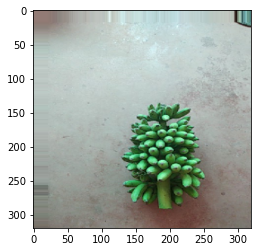

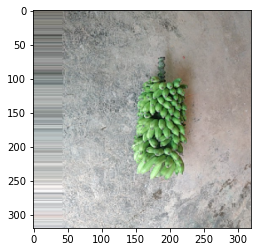

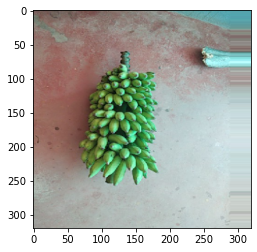

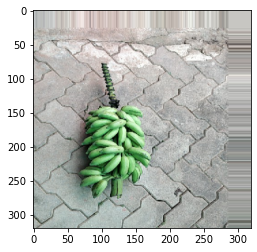

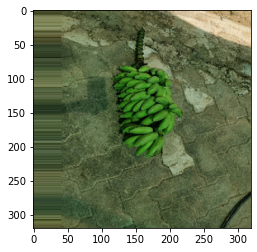

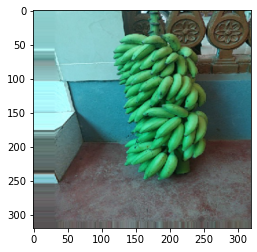

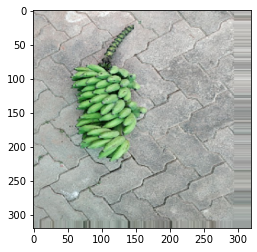

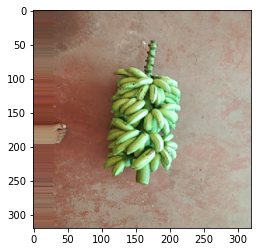

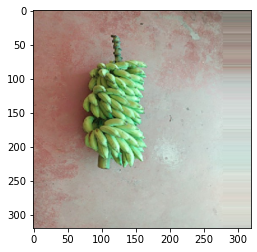

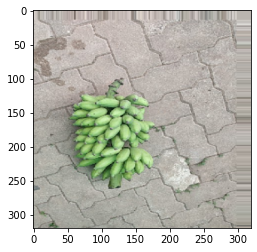

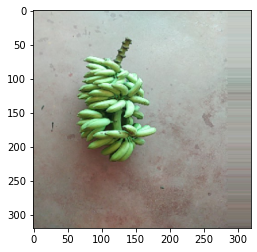

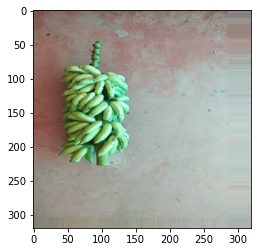

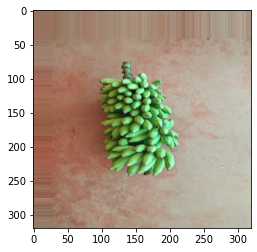

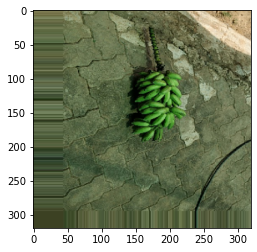

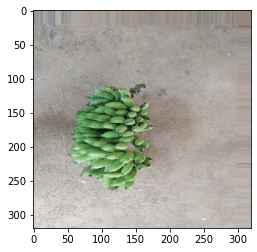

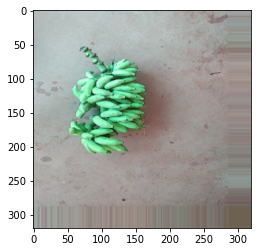

In [14]:
import matplotlib.pyplot as plt
x_batch, y_batch = next(train_datagen)

for i in range (0,16):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()